### BBC Documents Classification

This is a supervised learning task where the news documents are classified into five different categories which are 'business', 'entertainment', 'politics ', 'sport', 'tech'. Here CountVectorizer is used to convert text into vector. There are 4 variations of CountVectorizer used. (1) Normal CountVectorizer along with incorporating default english stopwords. (2) CountVectorizer is used with tokenization done through lemmatization and automatic parts of speech tagging using an inbuilt pos_tag in nltk. (3) CountVectorizer is used with tokenization done through stemming. (4) CountVectorizer with simple string split as tokenization method is used. 

Accuracy of all the four models are determined to evaluate the performance of each variation. Although lemmatization is a sophisticated way of tokenization, it did not perform better than other variations. A simple string split performed really good so it suggests that a simple string split as tokenization can do good. 

### Import Required Libraries

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk

### Import Scikit Libraries

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

### Import nltk Libraries

In [55]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

### Download

In [73]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\ishid/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ishid/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to C:\Users\ishid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\ishid/nltk_data...


True

### Load the Dataset

In [57]:
df = pd.read_csv('bbc_text_cls.csv')

In [58]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [59]:
df.iloc[0]['text']

'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sig

### Check if Classes are Balanced or not.

<Axes: xlabel='labels', ylabel='count'>

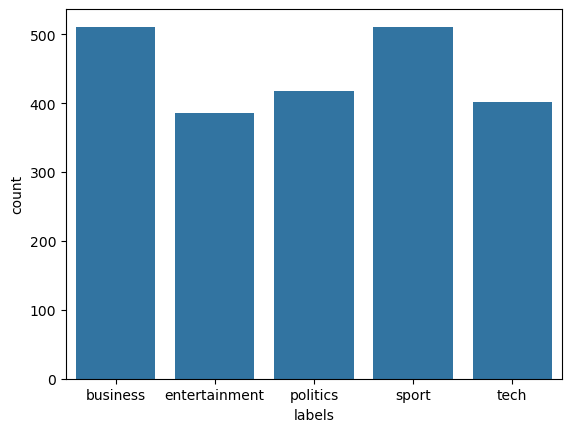

In [60]:
sns.countplot(data=df, x='labels')

There are five categories, namely 'business', 'entertainment', 'politics ', 'sport', 'tech'. The classes seem balanced so 'accuracy' can be used as a metric to measure the performance of a model.

In [61]:
x = df['text']
y = df['labels']

In [62]:
x_input, x_output, y_input, y_output = train_test_split(x, y, random_state=123)

In [63]:
x_input.shape

(1668,)

### Implementing CountVectorizer (Without any Variation) 

In [64]:
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(x_input)
x_test = vectorizer.transform(x_output)

In [65]:
x_train

<1668x26287 sparse matrix of type '<class 'numpy.int64'>'
	with 337411 stored elements in Compressed Sparse Row format>

Check how sparse the matrix is :

In [66]:
# To check how sparse the matrix is
(x_train !=0).sum()/ np.prod(x_train.shape)

0.007695239935415004

In [67]:
model= MultinomialNB()
model.fit(x_train, y_input)

MultinomialNB()

In [68]:
print("Train Score: ", model.score(x_train, y_input))
print("Test Score: ", model.score(x_test, y_output))

Train Score:  0.9922062350119905
Test Score:  0.9712746858168761


### CountVectorizer (Incorporating Default English Stopwords)

In [69]:
# Lets Implement the same CountVectorizer with incorporating stopwords
vectorizer = CountVectorizer(stop_words='english')
x_train = vectorizer.fit_transform(x_input)
x_test = vectorizer.transform(x_output)
model= MultinomialNB()
model.fit(x_train, y_input)
print("Train Score: ", model.score(x_train, y_input))
print("Test Score: ", model.score(x_test, y_output))

Train Score:  0.9928057553956835
Test Score:  0.9766606822262118


### CountVectorizer (Tokenization through Wordnet Lemmatization)

In [70]:
#Lets Implement Lemmatization
def get_pos_tag(tag):
    if tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('R'):
        return wordnet.ADV
    elif tag.startswith('N'):
        return wordnet.NOUN
    else:
        return wordnet.NOUN

In [71]:
def output_lemma(doc):
    output_list=[]
    lemmatizer= WordNetLemmatizer()
    tokens = word_tokenize(doc)
    word_and_tag = nltk.pos_tag(tokens)
    for word,tag in word_and_tag:
        lemma= lemmatizer.lemmatize(word, pos=get_pos_tag(tag))
        output_list.append(lemma)
    return output_list   

In [74]:
# Lets Implement the same CountVectorizer with incorporating tokens as obtained through WordNetLemmatizer
vectorizer = CountVectorizer(tokenizer=lambda doc:output_lemma(doc))
x_train = vectorizer.fit_transform(x_input)
x_test = vectorizer.transform(x_output)
model= MultinomialNB()
model.fit(x_train, y_input)
print("Train Score: ", model.score(x_train, y_input))
print("Test Score: ", model.score(x_test, y_output))

Train Score:  0.9922062350119905
Test Score:  0.9676840215439856


### CountVectorizer (Tokenization through Stemming)

In [75]:
def output_stemma(doc):
    output_list=[]
    stemmer= PorterStemmer()
    tokens = word_tokenize(doc)
    for word in tokens:
        stemma= stemmer.stem(word)
        output_list.append(stemma)
    return output_list  

In [76]:
# Lets Implement the same CountVectorizer with incorporating tokens as obtained through WordNetLemmatizer
vectorizer = CountVectorizer(tokenizer=lambda doc:output_stemma(doc))
x_train = vectorizer.fit_transform(x_input)
x_test = vectorizer.transform(x_output)
model= MultinomialNB()
model.fit(x_train, y_input)
print("Train Score: ", model.score(x_train, y_input))
print("Test Score: ", model.score(x_test, y_output))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Train Score:  0.9892086330935251
Test Score:  0.9694793536804309


### CountVectorizer (Tokenization through String Split)

In [77]:
def output_string(doc):
    return doc.split()

In [78]:
# Lets Implement the same CountVectorizer with incorporating tokens as obtained through WordNetLemmatizer
vectorizer = CountVectorizer(tokenizer=lambda doc:output_string(doc))
x_train = vectorizer.fit_transform(x_input)
x_test = vectorizer.transform(x_output)
model= MultinomialNB()
model.fit(x_train, y_input)
print("Train Score: ", model.score(x_train, y_input))
print("Test Score: ", model.score(x_test, y_output))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Train Score:  0.9952038369304557
Test Score:  0.9712746858168761
